<a href="https://colab.research.google.com/github/thanktua-spp/plant-leaf-classification/blob/main/ThankGod_Egbe_Week_1_Project_Building_a_Leaf_Classification_App.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> 1. DUPLICATE THIS COLAB TO START WORKING ON IT. Using File > Save a copy to drive.
> 2. SET THE "General Access" OF THE COPIED NOTEBOOK TO "Anyone with the link" BY CLICKING ON "Share" TO ENABLE SHARING WITH YOUR PEERS FOR REVIEW.


### This project is from [Abubakar Abid's](https://twitter.com/abidlabs) course: *Building Computer Vision Applications* on CoRise. Learn more about the course [here](https://corise.com/course/computer-vision).



---





# Week 1 Project: Building a Leaf Classification App

Welcome to the first week's project for *Building Computer Vision Applications*!

In this week, we are going to get familiar with the key steps of building machine learning apps, with a particular focus on image classification. Specifically, we will cover:

* finding computer vision datasets and pretrained models 📖
* fine-tuning an image classifier model on new data 👾
* deploying a [Gradio app](http://gradio.dev/) you can run on your phone or laptop 📷
* measuring the performance of a classification model on test data and the real world 📈

# Introduction

Beans are an important cereal food crop in many parts of the world. However, certain diseases can damage bean plants, causing food shortages. As a result, it is critical to monitor the leaves of bean plants frequently and accurately. Many farming businesses are turning to imaging and machine learning to monitor their crops automatically and accurately.

This is a great example of where **image classification** can solve a real business problem. The concepts you will learn in this project will be generally applicable to many other kinds of image classification, and more broadly machine learning, tasks. 

Our end goal will be to build a web-application that can take in an image of a bean leaf and predict whether it is healthy or diseased. The app will look something like this: 

![](https://i.ibb.co/6mcXB53/image.png)

# Step 0: Hardware Setup & Software Libraries

We will be utilizing GPUs to train our machine learning model, so we will need to make sure that our Colab notebook is set up correctly. Go to the menu bar and click on Runtime > Change runtime type > Hardware accelerator and **make sure it is set to GPU**. Your Colab notebook may restart once you make the change.

We're going to be using some fantastic open-source Python libraries to load our dataset (`datasets`), train our model (`transformers`), evaluate our model (`evaluate`), and build a demo of our model (`gradio`). So let's go ahead and install all of these libraries. 

In [1]:
!pip install datasets transformers evaluate gradio 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 431 kB 30.5 MB/s 
     |████████████████████████████████| 4.9 MB 47.4 MB/s 
     |████████████████████████████████| 69 kB 8.3 MB/s 
     |████████████████████████████████| 5.3 MB 64.0 MB/s 
     |████████████████████████████████| 212 kB 69.9 MB/s 
     |████████████████████████████████| 120 kB 58.9 MB/s 
     |████████████████████████████████| 115 kB 65.8 MB/s 
     |████████████████████████████████| 127 kB 70.9 MB/s 
     |████████████████████████████████| 6.6 MB 60.2 MB/s 
     |████████████████████████████████| 212 kB 75.1 MB/s 
     |████████████████████████████████| 55 kB 3.3 MB/s 
     |████████████████████████████████| 54 kB 3.2 MB/s 
     |████████████████████████████████| 112 kB 48.6 MB/s 
     |████████████████████████████████| 57 kB 2.1 MB/s 
     |████████████████████████████████| 2.3 MB 42.9 MB/s 
     |████████████████████████████████|

# Step 1: Loading a Dataset

In this project, we will be using the `datasets` library, which can load tens of thousands of datasets with a single line of code. It can also be used to apply preprocessing functions. Learn more about the datasets library here: https://huggingface.co/docs/datasets/tutorial

Most datasets are divided into different splits. For example, you'll often see a *training* data subset, which is used to build the model, a *validation* data subset, which is used to measure the performance of the model while it is training, and a *test* dataset which is used to measure the performance of the model at the very end of training, and is usually considered how well the model will perform in the real world (we'll come back to this).

Specifically, we will be using the `beans` dataset that is available for free from the Hugging Face Hub: https://huggingface.co/datasets/beans

* **Load the Beans Dataset**

In [2]:
import datasets

dataset = datasets.load_dataset('beans')

Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/1034 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/133 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/128 [00:00<?, ? examples/s]

Dataset beans downloaded and prepared to /root/.cache/huggingface/datasets/beans/default/0.0.0/90c755fb6db1c0ccdad02e897a37969dbf070bed3755d4391e269ff70642d791. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

* **Explore the dataset by running the cells below and answer the questions below**

In [3]:
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['image_file_path', 'image', 'labels'],
        num_rows: 1034
    })
    validation: Dataset({
        features: ['image_file_path', 'image', 'labels'],
        num_rows: 133
    })
    test: Dataset({
        features: ['image_file_path', 'image', 'labels'],
        num_rows: 128
    })
})


In [4]:
# My packages
import matplotlib.pyplot as plt
import random

In [5]:
dataset['train'][500]['labels']

2

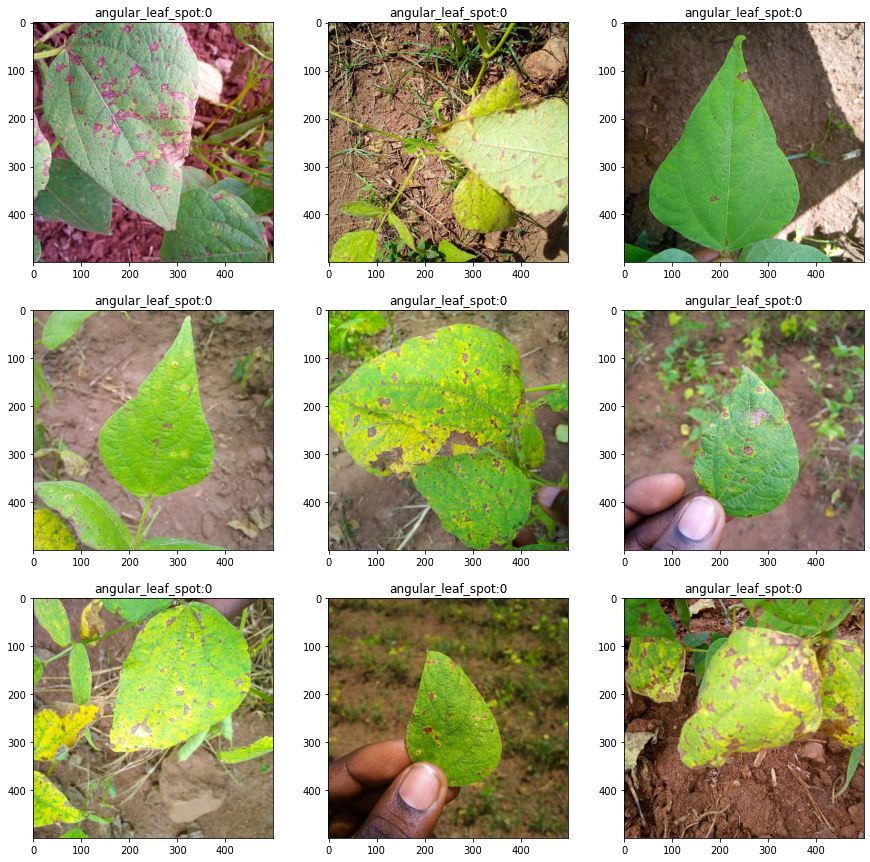

In [6]:
# Dictionary labels for numeric encoding and string name.
labels = {0:'angular_leaf_spot', 1:'bean_rust', 2:'healthy'}

# View the first ten images in the dataset in Grid
plt.figure(figsize=(15, 15))
for i in range(9):
  ax = plt.subplot(3, 3, i+1)
  plt.imshow(dataset['train'][i]['image'])
  label_key = dataset['train'][i]['labels']
  plt.title(f'{labels[label_key]}:{label_key}')

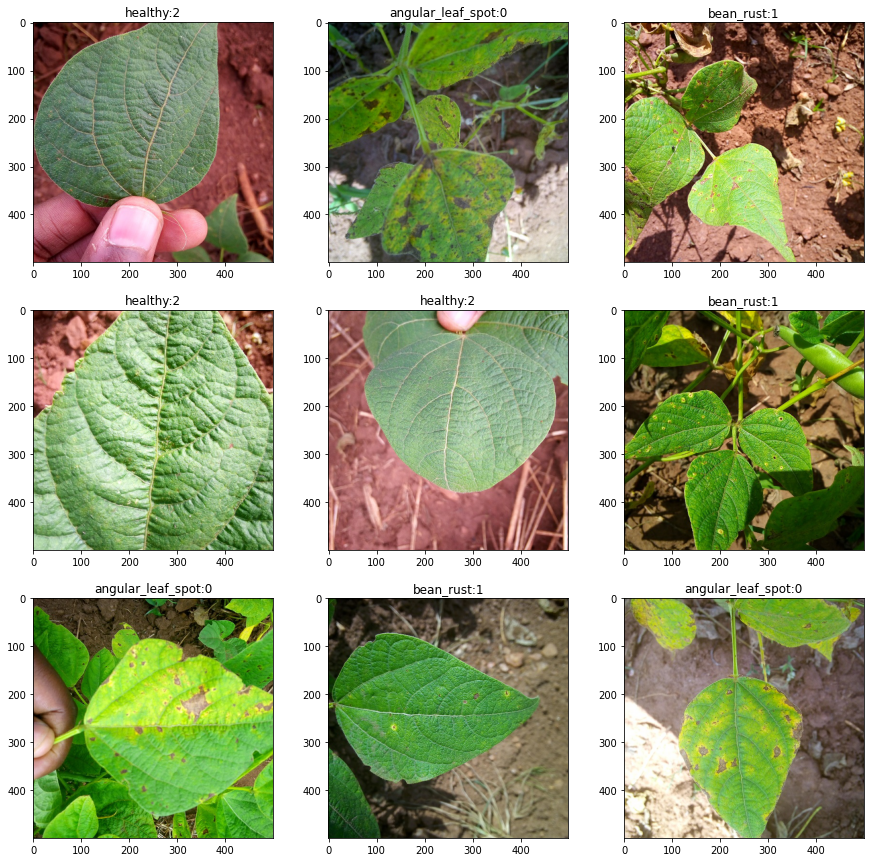

In [7]:
# It is interesting for me to view a more diverse set of the images
plt.figure(figsize=(15, 15))
for i in range(9):
  plt.subplot(3, 3, i+1)
  img_num = int(random.uniform(0, len(dataset['train'])))
  label_key = dataset['train'][img_num]['labels']

  plt.imshow(dataset['train'][img_num]['image'])
  plt.title(f'{labels[label_key]}:{label_key}')

In [8]:
# View the labels
dataset['train'].features['labels']

ClassLabel(num_classes=3, names=['angular_leaf_spot', 'bean_rust', 'healthy'], id=None)

In [9]:
# View dataset count information
print(f"len of train samples = {len(dataset['train'])}")
print(f"len of train samples = {len(dataset['validation'])}")
print(f"len of train samples = {len(dataset['test'])}")

len of train samples = 1034
len of train samples = 133
len of train samples = 128


* What information do we have for each sample?
  - Each sample is a dictionary of keys containing the information as follows `dict_keys(['image_file_path', 'image', 'labels'])`

* How many training samples do we have? Validation samples? Test samples? 
  - There are 1034 train samples, 133 validation samples, 128 test samples.

* How many different classes are there in this dataset, and what are the class labels? 
  - there are 3 distinct class labels, their names are 'angular_leaf_spot', 'bean_rust', 'healthy'.

* Looking at the first 10 training images, do you notice anything interesting about the images in the dataset? Are they as diverse/representative as you would expect or do they have limitations?
  - The first 10 images are mostly thesame from the healthy class label, I was interest to get a mix of different class label visualized so I created a random select of some images (this was mostly satisfying for me).

# Step 2: Loading a Pretrained Model

We will be using the `transformers` library, which can load tens of thousands of machine learning models with a few lines of code. It can also be used to fine-tune these models. Learn more about the `transformers` library here: https://huggingface.co/docs/transformers/index

Specifically, we will be using the `Vision Image Transformer` model that is available to anyone from the Hugging Face Hub: https://huggingface.co/google/vit-base-patch16-224. While the details of vision transformers are beyond the scope of this course, we will point out that they are a successor of the widely used convolutional neural network (CNN) architecture and tend to perform better than CNNs at the same tasks (image classificaiton, segmentation, etc.)

Let's start by seeing how the Vision Image Transformer model performs without any further fine-tuning.

* **Load the Vision Image Transformer Model for Inference**

In [10]:
import transformers
import torch

device = 'cuda'

model = transformers.ViTForImageClassification.from_pretrained('google/vit-base-patch16-224')

model.eval()
model.to(device);

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


Moving 0 files to the new cache system


0it [00:00, ?it/s]

Downloading:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/346M [00:00<?, ?B/s]

We also need to load the **feature extractor** corresponding to the model, so that we can convert the input images into feature vectors that the model can take as input.

In [11]:
feature_extractor = transformers.ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224')

Downloading:   0%|          | 0.00/160 [00:00<?, ?B/s]

* **Use the Vision Image Transformer Model to Make a Prediction on the Training Images**

The documentation here may be helpful: https://huggingface.co/docs/transformers/model_doc/vit#transformers.ViTForImageClassification.forward.example

In [12]:
# First we get the features corresponding to the first training image
encoding = feature_extractor(images=dataset['train'][0]['image'], return_tensors="pt").to(device)

# Then pass it through the model and get a prediction

######
with torch.no_grad():
  logits = model(**encoding).logits 
###### without torch.no_grad() still works

prediction = logits.argmax(-1).item()

print("Predicted class:", model.config.id2label[prediction])

Predicted class: hen-of-the-woods, hen of the woods, Polyporus frondosus, Grifola frondosa


* Try running the model on the first 10 samples in the dataset. 

In [13]:
encoding = feature_extractor(images=dataset['train'][:10]['image'], return_tensors="pt").to(device)
with torch.no_grad():
  logits = model(**encoding).logits
  
predictions = logits.argmax(-1)
for index, item in enumerate(predictions):
  pred_class = model.config.id2label[item.item()]
  print(f'{index}: {pred_class}')

0: hen-of-the-woods, hen of the woods, Polyporus frondosus, Grifola frondosa
1: sulphur butterfly, sulfur butterfly
2: cucumber, cuke
3: leaf beetle, chrysomelid
4: leaf beetle, chrysomelid
5: leaf beetle, chrysomelid
6: vine snake
7: leaf beetle, chrysomelid
8: cucumber, cuke
9: cucumber, cuke


What is the most common prediction? Why do you think that is? [ANSWER HERE]

# Step 3: Fine-tuning Your Model on the Dataset

Off the shelf, the Vision Image Transformer will not be usable for the task that we have in mind, since it was trained for "general" image classification, not for the specific categories that we would like to predict. As a result, we will need to "fine-tune" our model.

Learn more about fine-tuning models with the `transformers` library here: https://huggingface.co/docs/transformers/training

We will also need to decide which metric to use for our task. Since our task is a simple image classification task, the `accuracy` metric seems reasonable: https://huggingface.co/spaces/evaluate-metric/accuracy

* **Preprocess the Dataset**

To make things faster, we are going to preprocess the entire dataset so that we convert all of the images to feature vectors. This will allow us to speed up the training as we can pass the feature vectors directly. This code has already been written for you:

In [14]:
import torch

def transform(example_batch):
    inputs = feature_extractor([x for x in example_batch['image']], return_tensors='pt')
    inputs['labels'] = example_batch['labels']
    return inputs

prepared_ds = dataset.with_transform(transform)

In [15]:
prepared_ds

DatasetDict({
    train: Dataset({
        features: ['image_file_path', 'image', 'labels'],
        num_rows: 1034
    })
    validation: Dataset({
        features: ['image_file_path', 'image', 'labels'],
        num_rows: 133
    })
    test: Dataset({
        features: ['image_file_path', 'image', 'labels'],
        num_rows: 128
    })
})

* **Load the Accuracy Metric**

We now have to decide on a *metric* we will use to measure the performance for our machine learning model. A natural choice for image classification is *accuracy*, which measures the percentage of images that are predicted to have the correct label. 

Read about the `evaluate` library, which contains many common machine learning metrics here: https://github.com/huggingface/evaluate

And use the `evaluate.load()` to load the accuracy metric:

In [16]:
from transformers import AutoModelForImageClassification
import numpy as np
import evaluate

labels = dataset['train'].features['labels'].names

model = AutoModelForImageClassification.from_pretrained(
    "google/vit-base-patch16-224",
    num_labels=len(labels),
    id2label={i: c for i, c in enumerate(labels)},
    label2id={c: i for i, c in enumerate(labels)},
    ignore_mismatched_sizes=True 
)

metric = evaluate.load('accuracy')

def compute_metrics(sample):
  return metric.compute(
      predictions=np.argmax(sample.predictions, axis=1), 
      references=sample.label_ids)

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized because the shapes did not match:
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([3, 768]) in the model instantiated
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([3]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


* **Fine-Tune the Vision Image Transformer Model on the Entire Training Set**

Now, we will take all of the code that you have written and use it to fine-tune the ViT model on the beans dataset. Simply run the code below, and your model will fine-tune for 4 epochs. On a **GPU**, this should take less than 5 minutes.

In [17]:
from transformers import Trainer, TrainingArguments

training_args = TrainingArguments(
  output_dir="./vit-base-beans",  # output directory where the model predictions and checkpoints will be written
  per_device_train_batch_size=16, # batch size
  learning_rate=2e-4,             # learning rate
  num_train_epochs=4,             # number of epochs to train for
  remove_unused_columns=False,    # keep the "image" column
  logging_steps=10,               # how often to print training metrics
  eval_steps=100,                 # how often to measure on the evaluation set
)

def collate_fn(batch):
    return {
        'pixel_values': torch.stack([x['pixel_values'] for x in batch]),
        'labels': torch.tensor([x['labels'] for x in batch])
    }

trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=collate_fn,
    compute_metrics=compute_metrics,
    train_dataset=prepared_ds["train"],
    eval_dataset=prepared_ds["validation"],
    tokenizer=feature_extractor,
)

In [18]:
train_results = trainer.train()
trainer.save_model("saved_model_files")
trainer.log_metrics("train", train_results.metrics)
trainer.save_metrics("train", train_results.metrics)
trainer.save_state()

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 1034
  Num Epochs = 4
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 260


Step,Training Loss
10,0.871100
20,0.305000
30,0.215200
40,0.311600
50,0.089600
60,0.807300
70,0.190800
80,0.147000
90,0.096600
100,0.042800




Training completed. Do not forget to share your model on huggingface.co/models =)


Saving model checkpoint to saved_model_files
Configuration saved in saved_model_files/config.json
Model weights saved in saved_model_files/pytorch_model.bin
Feature extractor saved in saved_model_files/preprocessor_config.json


***** train metrics *****
  epoch                    =         4.0
  total_flos               = 298497957GF
  train_loss               =       0.141
  train_runtime            =  0:02:45.59
  train_samples_per_second =      24.976
  train_steps_per_second   =        1.57


# Step 4: Reporting Model Metrics

In [19]:
train_results.metrics['train_loss']

0.14099011587364096

In [20]:
trainer.evaluate()['eval_loss']

***** Running Evaluation *****
  Num examples = 133
  Batch size = 8


0.029457617551088333

In [21]:
trainer.evaluate(prepared_ds["train"])

***** Running Evaluation *****
  Num examples = 1034
  Batch size = 8


{'eval_loss': 0.00021841592388227582,
 'eval_accuracy': 1.0,
 'eval_runtime': 19.2778,
 'eval_samples_per_second': 53.637,
 'eval_steps_per_second': 6.744,
 'epoch': 4.0}

In [22]:
trainer.evaluate(prepared_ds["validation"])

***** Running Evaluation *****
  Num examples = 133
  Batch size = 8


{'eval_loss': 0.029457617551088333,
 'eval_accuracy': 0.9924812030075187,
 'eval_runtime': 2.5149,
 'eval_samples_per_second': 52.886,
 'eval_steps_per_second': 6.76,
 'epoch': 4.0}

* **Measure Loss on the Validation Dataset**

* What is the loss on the training set and validation sets?
  - I got a loss of 0.1319 on the training sets.
  - I also got a loss of 0.0222 on the validation sets
* Is there any sign of overfitting? [ANSWER HERE]


* **Measure Accuracy on the Test Dataset**


In [23]:
from transformers import pipeline
from evaluate import evaluator

In [24]:
trainer.evaluate(prepared_ds["test"])

***** Running Evaluation *****
  Num examples = 128
  Batch size = 8


{'eval_loss': 0.046361345797777176,
 'eval_accuracy': 0.984375,
 'eval_runtime': 2.3827,
 'eval_samples_per_second': 53.72,
 'eval_steps_per_second': 6.715,
 'epoch': 4.0}

In [25]:
# FILL HERE
test_data = datasets.load_dataset('beans', 'full_size', split='test')
test_data = test_data.rename_column('labels', 'label')

pipe = pipeline('image-classification',
                model=model,
                feature_extractor=feature_extractor,
                device=0
                )

metric = evaluate.load('accuracy')

eval = evaluator('image-classification')

mapping = {'angular_leaf_spot':0, 'bean_rust':1, 'healthy':2}#pipe.model.config.label2id
results = eval.compute(model_or_pipeline=pipe, 
                       data=test_data,
                       metric=metric,
                       label_mapping=mapping)

print(results)

Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Dataset beans downloaded and prepared to /root/.cache/huggingface/datasets/beans/full_size/0.0.0/90c755fb6db1c0ccdad02e897a37969dbf070bed3755d4391e269ff70642d791. Subsequent calls will reuse this data.


Disabling tokenizer parallelism, we're using DataLoader multithreading already


{'accuracy': 0.984375, 'total_time_in_seconds': 2.7523301650000462, 'samples_per_second': 46.506048448587144, 'latency_in_seconds': 0.02150257941406286}


* What is your final test accuracy? With the default parameters above, you should expect at test accuracy around 90% or higher.
  - I got a test accuracy of about 0.96875 using both the trainer API and the evaluator compute custom pipeline.


# Step 5: Building a Demo

A high-level metric like test accuracy doesn't give us a great idea of how the model will work when presented with new data from the real world. To understand this, we will build a web-based demo that can be used on our phones or computers through a web browser to test our model.

The `gradio` library lets you build web demos of machine learning models with just a few lines of code. Learn more about Gradio here: https://gradio.app/getting_started/

Gradio lets you build machine learning demos simply by specifying (1) a prediction function, (2) the input type and (3) the output type of your model. We have already written most of the prediction code for you. We've reloaded the model and dataset so that the following code runs in a standalone manner, which will be important for Step 6.

In [26]:
import datasets
from transformers import AutoFeatureExtractor, AutoModelForImageClassification

dataset =  datasets.load_dataset('beans') # This should be the same as the first line of Python code in this Colab notebook

extractor = AutoFeatureExtractor.from_pretrained("saved_model_files")
model = AutoModelForImageClassification.from_pretrained("saved_model_files")

labels = dataset['train'].features['labels'].names

def classify(im):
  features = feature_extractor(im, return_tensors='pt')
  logits = model(features["pixel_values"])[-1]
  probability = torch.nn.functional.softmax(logits, dim=-1)
  probs = probability[0].detach().numpy()
  confidences = {label: float(probs[i]) for i, label in enumerate(labels)} 
  return confidences

  0%|          | 0/3 [00:00<?, ?it/s]

loading configuration file saved_model_files/preprocessor_config.json
Feature extractor ViTFeatureExtractor {
  "do_normalize": true,
  "do_resize": true,
  "feature_extractor_type": "ViTFeatureExtractor",
  "image_mean": [
    0.5,
    0.5,
    0.5
  ],
  "image_std": [
    0.5,
    0.5,
    0.5
  ],
  "resample": 2,
  "size": 224
}

loading configuration file saved_model_files/config.json
Model config ViTConfig {
  "_name_or_path": "saved_model_files",
  "architectures": [
    "ViTForImageClassification"
  ],
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "id2label": {
    "0": "angular_leaf_spot",
    "1": "bean_rust",
    "2": "healthy"
  },
  "image_size": 224,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "angular_leaf_spot": 0,
    "bean_rust": 1,
    "healthy": 2
  },
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_c

* **Build a Gradio web demo of your image classifier and `launch()` it**

Create a `gradio.Interface` and launch it! For image classification, the input component should be `"image"` and output should be a `"label"`. Please also make sure to add a `title`, a `description`, and some image `examples` to make the app easy to use.

Note that we have set `debug=True`, which keeps the following cell running continuously. Press the "stop" icon next to the cell to stop execution so that you can run or re-run other cells.

In [27]:
import gradio as gr

interface = gr.Interface(
    classify,
    inputs='image',
    outputs='label',
    )

interface.launch(debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://17624.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://huggingface.co/spaces


Keyboard interruption in main thread... closing server.


(<gradio.routes.App at 0x7f35a9cd45d0>,
 'http://127.0.0.1:7860/',
 'https://17624.gradio.app')

# Step 6: Upload your Demo with Spaces and Try it with "Real World" Data!

* **Create a Hugging Face account and upload your demo to Spaces**

1. Create a free Hugging Face account if you do not already have one: https://huggingface.co/login
1. Create a new **public** Space with the code for your Gradio app. You might find this tutorial helpful: https://huggingface.co/blog/gradio-spaces (Note that in addition to uploading the code for your Gradio demo, you'll also need to upload the saved model files and some example images, as well as a `requirements.txt` file).
1. Once your app launches, please put the link to your Space here:

[ANSWER HERE]

* **Open up your Space on your phone**

Now test your model on some real images of plants -- either images you find online or those outside your house (they don't have be bean plants for this part). What do you notice about the kinds of predictions your model makes? Do the predictions tend to skew towards a particular class? What could be done to improve the model's prediction on real world data? 

[ANSWER HERE]

# Bonus: Extensions

Now that you've worked through the project and have a functioning app, what else can we try?
* **How many images do you need to train an image classifier?** Finetune a ViT as you did before, but with different subsets of the data of various sizes. How does that affect the final training and test accuracies? Make a plot showing the train and test accuracies as a function of dataset size.
* **Try a zero-shot image classification model.** In lecture, we talked about zero-shot image classification models, which do not have to be retrained for specific applications. How well does a zero-shot classifier like [CLIP](https://huggingface.co/openai/clip-vit-large-patch14) work for this problem?
* **Train a ViT from scratch.** On the other end of the spectrum, we can retrain a ViT from scratch. Repeat the exercise above using a randomly initialized ViT. How does this affect the final train and test performance?
* **Train a Convolutional Neural Network (CNN)**: CNNs, although a predecessor to vision transformers, are still widely used in industry. What happens if you train a CNN (like [ResNet](https://huggingface.co/microsoft/resnet-50)) instead? How does the training time compare to that of the Vision Transformer? How does the final training and test accuracy compare?

---

### This project is from [Abubakar Abid's](https://twitter.com/abidlabs) course: *Building Computer Vision Applications* on CoRise. Learn more about the course [here](https://corise.com/course/computer-vision).

